<a href="https://colab.research.google.com/github/uma0762/EDA-files/blob/main/train(1)_csv_linear_regression_eda_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("train (1).csv")

In [ ]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
data.shape

(700, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
data.isna().sum()

x    0
y    1
dtype: int64

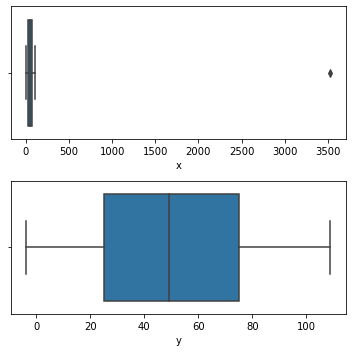

In [ ]:
fig, axs = plt.subplots(2, figsize=(5,5))
plt1 = sns.boxplot(data['x'], ax= axs[0])
plt2 = sns.boxplot(data['y'],ax= axs[1] )
plt.tight_layout()

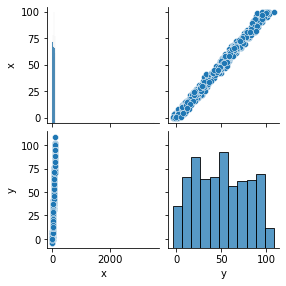

In [ ]:
#EDA
sns.pairplot(data,x_vars= ['x','y'],height= 2,kind='scatter')
plt.show()

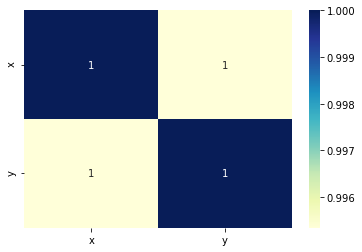

In [ ]:
sns.heatmap(data.corr(),cmap='YlGnBu', annot=True)
plt.show()

In [ ]:
X = data['x']
y = data['y']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7, random_state=42)

In [ ]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
lr.params

const   -0.022725
x        0.998703
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.108e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:19:34   Log-Likelihood:                -1191.2
No. Observations:                 489   AIC:                             2386.
Df Residuals:                     487   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0227      0.259     -0.088      0.9

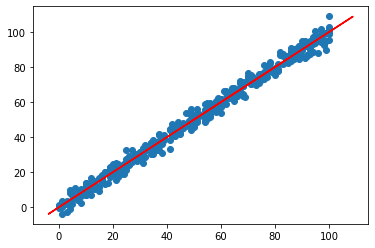

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(y_train, -0.0227 +0.9987*y_train , 'r')
plt.show()

In [ ]:
y_train_pred =lr.predict(x_train_sm)
res = (y_train - y_train_pred)

<Figure size 432x288 with 0 Axes>

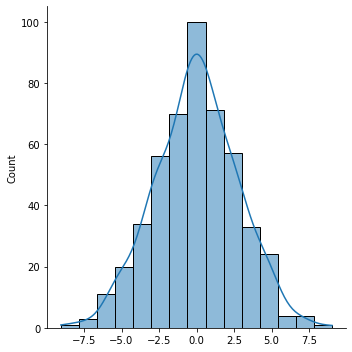

In [ ]:
fig = plt.figure()
sns.displot(res,bins=15, kde=True)
plt.show()

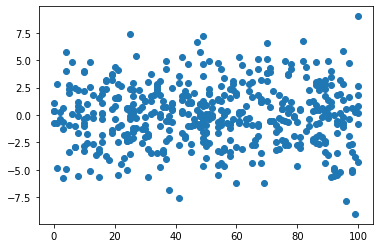

In [ ]:
plt.scatter(x_train,res)
plt.show()

In [ ]:
x_test_sm = sm.add_constant(x_test)
y_test_sm = sm.add_constant(y_test)
y_pred =lr.predict(x_test_sm)
x_pred =lr.predict(y_test_sm)

In [ ]:
y_pred.head()

158    99.847570
500    96.851461
396    19.951334
155    85.865729
321    16.955225
dtype: float64

In [ ]:
x_pred.head()

158    96.475229
500    94.151302
396    17.090561
155    86.685984
321    17.291604
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
mean_squared_error(x_test,y_pred)

0.1088690699535768

In [ ]:
print(r2_score(x_test,y_pred))

0.9999981268197753


In [ ]:
x_train

649    89.0
291     1.0
420    68.0
177    82.0
456    89.0
       ... 
71     64.0
106    71.0
270    46.0
435    28.0
102    46.0
Name: x, Length: 489, dtype: float64

In [ ]:
df = pd.DataFrame()
df['x_train']=list(x_train)
df['y_train']= list(y_train)

In [ ]:
df.head()

,x_train,y_train
0,89.0,84.480457
1,1.0,3.778210
2,68.0,64.432316
3,82.0,86.790023
4,89.0,91.729607


In [ ]:
y_train.shape

(489,)

In [ ]:
np.array([x_train]).reshape(-1,1)

array([[ 89.],
       [  1.],
       [ 68.],
       [ 82.],
       [ 89.],
       [ 75.],
       [ 32.],
       [  8.],
       [ 90.],
       [ 83.],
       [ 67.],
       [ 49.],
       [ 54.],
       [ 60.],
       [ 99.],
       [ 55.],
       [ 81.],
       [ 16.],
       [ 26.],
       [ 62.],
       [ 21.],
       [ 57.],
       [ 35.],
       [  0.],
       [ 31.],
       [ 60.],
       [  5.],
       [ 58.],
       [ 92.],
       [ 74.],
       [ 84.],
       [100.],
       [ 85.],
       [ 83.],
       [  3.],
       [ 89.],
       [ 10.],
       [ 37.],
       [ 77.],
       [  4.],
       [ 34.],
       [ 30.],
       [ 91.],
       [ 25.],
       [ 15.],
       [ 48.],
       [ 51.],
       [ 92.],
       [  3.],
       [ 65.],
       [ 22.],
       [ 42.],
       [ 41.],
       [ 74.],
       [ 12.],
       [ 49.],
       [ 17.],
       [ 83.],
       [ 76.],
       [ 91.],
       [ 26.],
       [ 45.],
       [ 67.],
       [ 41.],
       [ 24.],
       [ 81.],
       [ 6